Importing the dependencies

# Data Extraction and Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset to a pandas dataframe
credit_card_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Inference: Imbalanced dataset

In [ ]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values

0 ---> Normal transactions

1 ---> Fraudulent transactions

In [ ]:
legit = credit_card_data[credit_card_data.Class ==0]
fraud = credit_card_data[credit_card_data.Class ==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Data Analysis

In [ ]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Compare the values for both transactions

credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Dealing with Unbalanced Data using Undersampling

Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions


number of fraudulenmt transactions are 492


In [ ]:
legit_sample = legit.sample(n=492)

Concatenating Two Dataframes

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis =0 )

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88661,62235.0,1.254041,-0.377083,0.154381,-1.034386,-0.476982,-0.208320,-0.366712,0.055136,1.396761,...,0.000277,0.179921,-0.235146,-0.500162,0.753778,-0.591690,0.063676,0.010519,20.00,0
167084,118476.0,-0.838515,-0.687202,1.255584,-3.164715,-0.123387,0.067715,-0.240287,0.133879,-1.940176,...,-0.191606,-0.257967,-0.243214,-0.013493,0.783994,-0.107162,0.247747,0.119905,60.00,0
210158,137863.0,-0.563274,1.112728,0.634563,-0.054422,1.268482,-0.414805,0.969668,-0.129946,-0.874451,...,-0.339831,-0.972655,-0.279093,0.419858,0.445326,0.482129,-0.004867,0.085759,4.49,0
33103,37092.0,1.198636,-0.489530,-0.372524,-0.298584,1.416174,3.962836,-1.179029,1.067166,0.795929,...,-0.132983,-0.385150,-0.021781,1.040540,0.406675,0.329932,0.015532,0.023939,28.75,0
234964,148187.0,1.922641,-1.595810,-0.616538,-1.100507,-0.957953,0.631334,-1.331910,0.209933,0.224904,...,0.280165,0.555601,-0.017202,-1.429608,-0.363351,-0.196966,0.010813,-0.036520,142.20,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Spliting the data into features and target

In [ ]:
x = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [ ]:
print(x)
print(y)

            Time        V1        V2        V3        V4        V5        V6  \
88661    62235.0  1.254041 -0.377083  0.154381 -1.034386 -0.476982 -0.208320   
167084  118476.0 -0.838515 -0.687202  1.255584 -3.164715 -0.123387  0.067715   
210158  137863.0 -0.563274  1.112728  0.634563 -0.054422  1.268482 -0.414805   
33103    37092.0  1.198636 -0.489530 -0.372524 -0.298584  1.416174  3.962836   
234964  148187.0  1.922641 -1.595810 -0.616538 -1.100507 -0.957953  0.631334   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

Splitting the data into training data and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify= y, random_state =2)

Using stratify =y , the data with 0 and 1 will be evenly distributed in both x_train and x_test

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


# Model_Training

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic regression Model with Training data
model.fit(x_train, y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
#accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)


In [ ]:
print('The Accuracy on training data: ', training_data_accuracy)

The Accuracy on training data:  0.951715374841169


In [ ]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('The Accuracy on testing data: ', testing_data_accuracy)

The Accuracy on testing data:  0.9238578680203046


Since the Accuracy of the training data and Testing data is very similar , there is no overfitting or underfitting

Confusion Matrix

In [ ]:
cm = confusion_matrix(x_test_prediction , y_test)

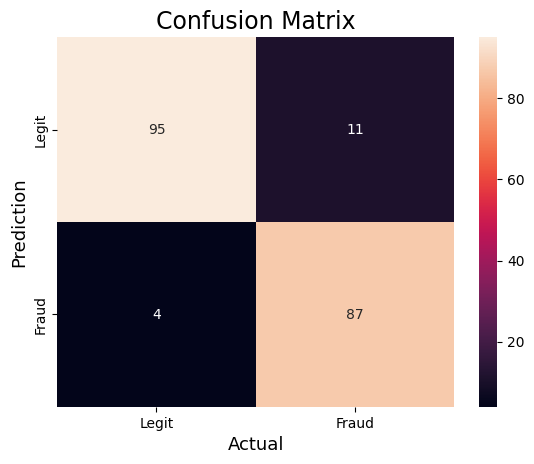

In [ ]:
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize =17)
plt.show()


print(classification_report(y_test, y_pred))

this is used to get the complete metric at one place

In [ ]:
precision = precision_score(y_test, x_test_prediction)
print("Precision :", precision)
recall = recall_score(y_test, x_test_prediction)
print("Recall    :", recall)
F1_score = f1_score(y_test, x_test_prediction)
print("F1-score  :", F1_score)

Precision : 0.9560439560439561
Recall    : 0.8877551020408163
F1-score  : 0.9206349206349207


In [ ]:
print(classification_report(y_test, x_test_prediction))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



ROC Curve

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, x_test_prediction, pos_label=1)

In [ ]:
auc_score = roc_auc_score(y_test, x_test_prediction)
print(auc_score)

0.9236755308183879


Its a high Auc Score so Model is really good

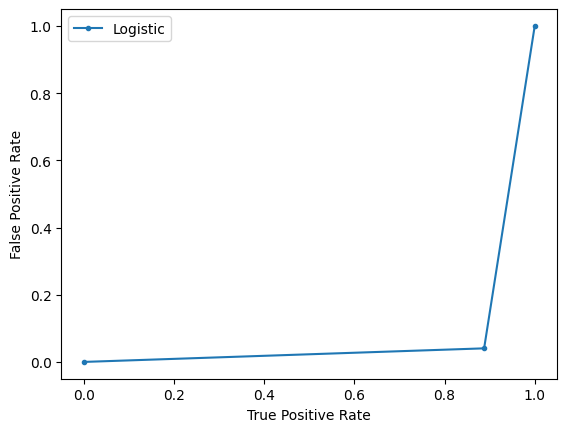

In [57]:
plt.plot(true_positive_rate,false_positive_rate,  marker='.', label='Logistic')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()